# 数据可视化

## 导入数据

In [148]:
import pandas as pd
import seaborn as sns
from matplotlib.font_manager import FontProperties
zhfont = FontProperties(fname='/notebooks/xkcd/Muyao-Softbrush.ttf', size=16)

In [142]:
df = pd.read_csv('./data/logs.csv')
df = df.dropna(axis = 0, how ='any') 
df.info()
type(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280059 entries, 0 to 280062
Data columns (total 10 columns):
day         280059 non-null object
time        280059 non-null object
domain      280059 non-null object
ip          280059 non-null object
port        280059 non-null object
city_id     280059 non-null float64
country     280059 non-null object
province    280059 non-null object
city        280059 non-null object
operator    280059 non-null object
dtypes: float64(1), object(9)
memory usage: 23.5+ MB


pandas.core.frame.DataFrame

## 生成数据

In [141]:
out_dir = './data'

### 1. 国际分布

In [186]:
df_global = df.groupby(['country']).count().sort_values(['domain'], ascending=False)['domain']
df_global

country
中国     188080
美国      86471
0        4041
爱尔兰       366
瑞典        262
智利        253
比利时       243
新加坡       101
加拿大        72
德国         68
印度         54
日本         44
新西兰         2
波兰          2
Name: domain, dtype: int64

### 2. 国内分布
中国各省分布情况

In [181]:
china_province = ['北京', '天津', '上海', '重庆', '河南省', '安徽省', '福建省', '甘肃省', '贵州省', '海南省', '河北省', '黑龙江省', '湖北省', '湖南省', '吉林省', '江苏省','江西省', '辽宁省', '青海省', '山东省', '山西省', '陕西省', '四川省', '云南省', '浙江省', '台湾省', '台湾', '广东省', '广西壮族自治区', '内蒙古自治区', '宁夏回族自治区', '西藏藏族自治区', '新疆维吾尔自治区', '香港', '澳门']

In [185]:
df_cn = df[df['province'].isin(china_province)]
df_cn.groupby(['province']).count().sort_values(['domain'], ascending=False)['domain']

province
广东省     54558
台湾省     49564
上海      37677
北京      14690
浙江省      9062
江苏省      4226
河北省      4216
天津       4017
福建省      2358
香港       1667
山东省      1427
江西省      1119
湖南省       863
河南省       847
湖北省       377
黑龙江省      341
海南省       226
四川省       101
山西省        38
安徽省        36
辽宁省        34
陕西省        32
贵州省        28
吉林省        27
重庆          1
Name: domain, dtype: int64

### 3. 域名排行

In [188]:
df['domain'].apply(lambda x: 'a' in x)

0                                 101.227.160.23
1                                 208.67.222.222
2                                 lbs.map.qq.com
3                            play.googleapis.com
4                                117.185.117.170
5                                 208.67.222.222
6                                 208.67.222.222
7                                117.185.117.170
8                               fclick.baidu.com
9                                 208.67.222.222
10                                 www.baidu.com
11                                s.bdstatic.com
12                                 ss0.baidu.com
13                                 www.baidu.com
14                                   m.baidu.com
15                              ss0.bdstatic.com
16                                 sp1.baidu.com
17                               sv.bdstatic.com
18                                 ss1.baidu.com
19                                 ss2.baidu.com
20                  

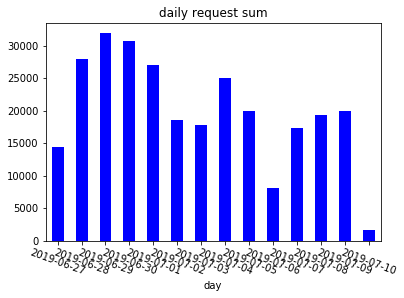

In [4]:
## 柱状图，每日请求数量
df.groupby(['day']).count()['domain'].plot(kind='bar', color='b', title='daily request sum', rot=-20)

In [16]:
## 折线图，每个小时的请求数量

In [19]:
## 域名指向的服务器地点，地图，国内各省份和全球各国家分布

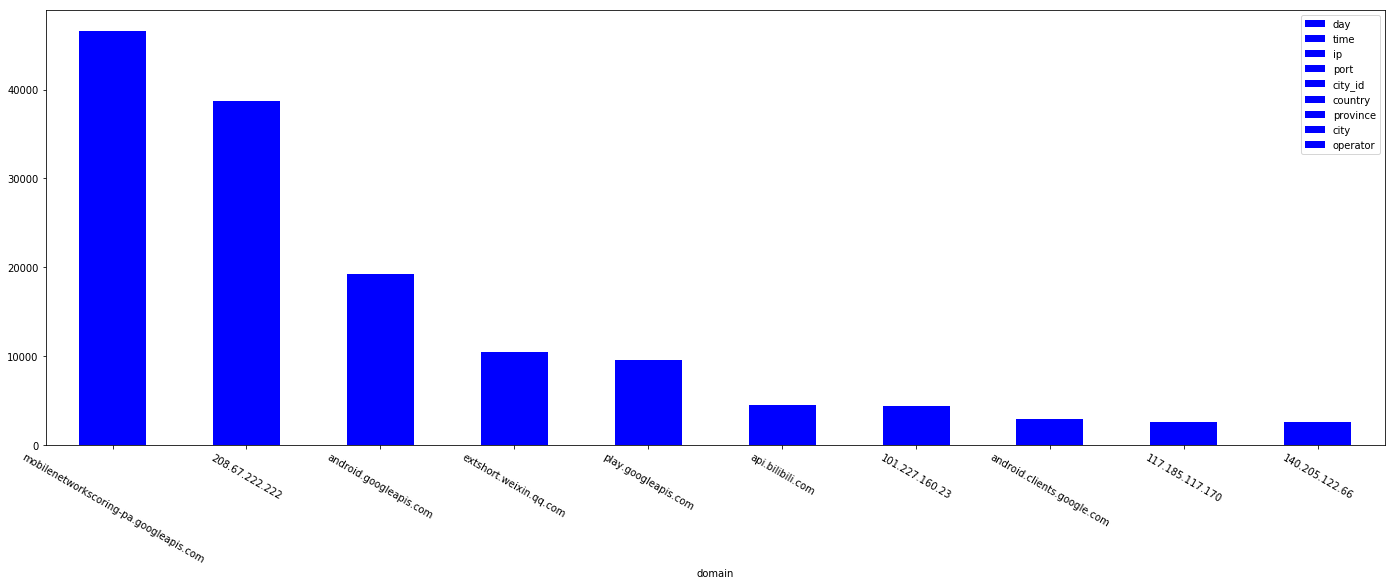

In [5]:
## 柱状图，所有域名排行与比例
df.groupby(['domain']).count().sort_values(['time'], ascending=False).head(10).plot(kind='bar', color='b',figsize=(24, 8), rot=-30)

In [ ]:
## 谷歌活动

In [ ]:
## 微信活动

In [6]:
## 一加是 oppo 的亲儿子

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121e249b0>],
      dtype=object)

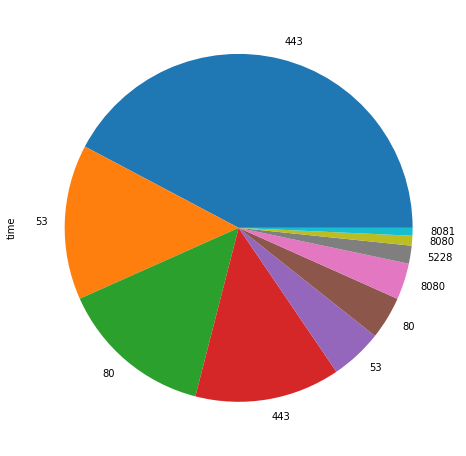

In [6]:
## 使用端口排名，饼图
df.groupby(['port']).count().sort_values(['time'], ascending=False).head(10)['time'].plot.pie(subplots=True, figsize=(8, 8))

In [ ]:
## 微信活动

In [ ]:
## 微信 vs 淘宝

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

countries = [
        'Albania',
        'Brazil',
        'Denmark',
        'France',
        'Mexico',
        'Nigeria',
        'Spain',
        'Germany',
        'Finland',
    ]

#the full dataframe
df = pd.DataFrame(
    data = {'country': countries, 'value' :np.random.rand(len(countries))},
    ).sort_values('value', ascending = False)

#the top 5
df2 = df[:5].copy()

#others
new_row = pd.DataFrame(data = {
    'country' : ['others'],
    'value' : [df['value'][5:].sum()]
})

#combining top 5 with others
df2 = pd.concat([df2, new_row])

#plotting -- for comparison left all countries and right 
#the others combined
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,9))
df.plot(kind = 'pie', y = 'value', labels = df['country'], ax = axes[0])
df2.plot(kind = 'pie', y = 'value', labels = df2['country'], ax = axes[1])
axes[0].set_title('all countries')
axes[1].set_title('top 5')
plt.show()